In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Loading Training Data set placed in root directory

In [9]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The distribution of numerical feature values across the samples....

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).

Survived is a categorical feature with 0 or 1 values.

Around 38% samples survived representative of the actual survival rate at 32%.

Most passengers (> 75%) did not travel with parents or children.

Nearly 30% of the passengers had siblings and/or spouse aboard.

Fares varied significantly with few passengers (<1%) paying as high as $512.

Few elderly passengers (<1%) within age range 65-80.

In [12]:
survived=df['Survived'].value_counts()
classwiseMeanofSurvived=df[['Pclass', 'Survived']].groupby(['Pclass'])
#print(survived)
print(classwiseMeanofSurvived)

In [13]:
df[["Sex", "Survived"]].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [14]:
df[["SibSp", "Survived"]].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [15]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [16]:
#corealtion
alive= df[df['Survived']==1]

cr=df.corrwith(alive)
cr

PassengerId    1.0
Survived       NaN
Pclass         1.0
Age            1.0
SibSp          1.0
Parch          1.0
Fare           1.0
dtype: float64

In [17]:
df[(df['Age']>70) & (df['SibSp']==0)] 
#df.query(('Age==70') or ('SibSp==5'))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [67]:
df['Fare'].min()
min_fare = df[(df['Sex']=="female") & (df['Fare']==0)]

min_fare



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [11]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [12]:
cr=df.corr()['Survived'].sort_values()
cr

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

# Bar plot of Number of Males and Females 

No handles with labels found to put in legend.


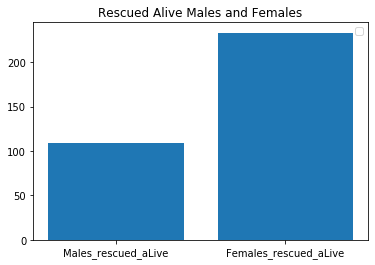

In [70]:

males_rescued_aLive=len(df[(df['Sex']=='male') & (df['Survived']==1)].values)

females_rescued_aLive=len(df[(df['Sex']=='female') & (df['Survived']==1)].values)

y=[males_rescued_aLive, females_rescued_aLive]
x=[1,2]
plt.title("Rescued Alive Males and Females")
labels = ['Males_rescued_aLive','Females_rescued_aLive']
plt.bar(x,y)
plt.xticks(x,labels)
plt.legend(loc='upper right')
plt.show()


In [74]:
males_on_ship=len(df[(df['Sex']=='male')].values)
females_on_ship=len(df[(df['Sex']=='female')].values)
males_on_ship,females_on_ship

(577, 314)

In [72]:
percent_males_survived=males_rescued_aLive/males_on_ship*100
percentfemales_survived=males_rescued_aLive/females_on_ship*100

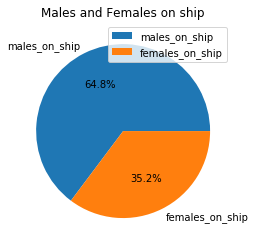

In [73]:
labels=['males_on_ship','females_on_ship']

plt.title("Males and Females on ship")
plt.pie([males_on_ship,females_on_ship],labels=labels, autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.show()

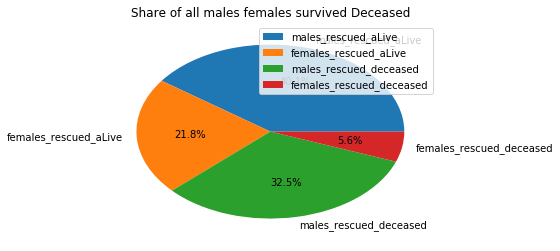

In [31]:
plt.title("Share of all males females survived Deceased")
labels2=['males_rescued_aLive','females_rescued_aLive','males_rescued_deceased','females_rescued_deceased']


plt.pie([males_on_ship,females_on_ship, males_on_ship-males_rescued_aLive, females_on_ship-females_rescued_aLive],labels=labels2, autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.show()

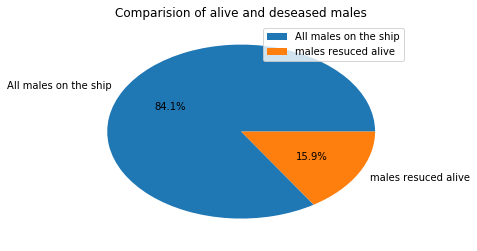

In [32]:
plt.title("Comparision of alive and deseased males")
labels2=['All males on the ship', 'males resuced alive']
plt.pie([males_on_ship,males_rescued_aLive], labels=labels2,autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.show()



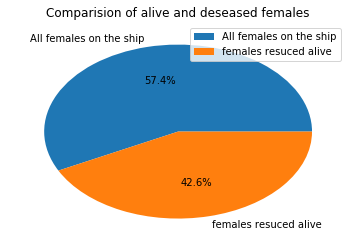

In [33]:
plt.title("Comparision of alive and deseased females")
labels2=['All females on the ship', 'females resuced alive']
plt.pie([females_on_ship,females_rescued_aLive], labels=labels2,autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.show()


# Display All Passengers Age Groupswise with histrogram chart
-All age groups distributed in ten, ten years
-All passengers Data with age groups wise (Blue color)

-All Survived passengers Data plot with (Green Color)

-All Unsurvived passengers data plot with (Red Color)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


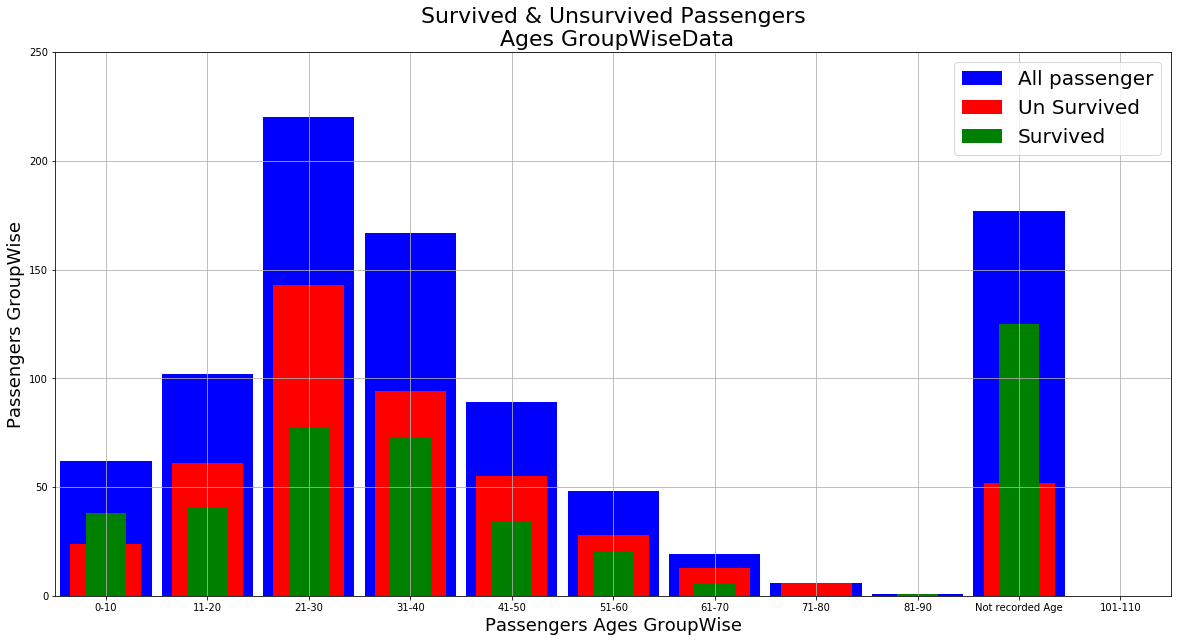

In [75]:
from collections import Counter

adata = df['Age'].values #All passengers data
sdata = df['Age'][(df.Survived==1)].values #All passengers Survived data
udata = df['Age'][(df.Survived==0)].values #All passengers unSurvived data
aNanAgedata = df['Age'].isnull().sum() # All not recorded age passengers
sNanAgedata = df['Age'][(df.Survived==1)].isnull().sum() # All not recorded age passengers survived
uNanAgedata = df['Age'][(df.Survived==0)].isnull().sum() # All not recorded age passengers unsurvived
 
#define function for groping passenger age wise
decile = lambda grade: grade // 10 * 10

allAgesPassengers = Counter(decile(age) for age in adata)
agesPassengersSurvived = Counter(decile(age) for age in sdata)
agesPassengersUnSurvived = Counter(decile(age) for age in udata)

plt.figure(figsize=(20,10))
#allAgesPassengers Data plot
plt.bar([x for x in allAgesPassengers.keys()], # shift each bar to the left by 4
        allAgesPassengers.values(), # give each bar its correct height
        9, color='b', label='All passenger') # give each bar a width of 8

#UnSurvived passenger data plot
plt.bar([x for x in agesPassengersUnSurvived.keys()], # shift each bar to the left by 4
        agesPassengersUnSurvived.values(), # give each bar its correct height
        7, color='r', label='Un Survived') # give each bar a width of 8


#Survived passenger data plot
plt.bar([x for x in agesPassengersSurvived.keys()], # shift each bar to the left by 4
        agesPassengersSurvived.values(), # give each bar its correct height
        4, color='g', label='Survived') # give each bar a width of 8

#Those passengers we have not recorded age
plt.bar(90,aNanAgedata, 9, color='b')
plt.bar(90,sNanAgedata, 7, color='r')
plt.bar(90,uNanAgedata, 4,  color='g')

plt.axis([-5, 105, 0, 250]) # x-axis from -5 to 105,
 # y-axis from 0 to 5
plt.xticks([10 * i for i in range(11)],['0-10','11-20','21-30','31-40','41-50','51-60','61-70',
                                       '71-80','81-90','Not recorded Age','101-110']) # x-axis labels at 0, 10, ..., 100
plt.xlabel("Passengers Ages GroupWise", fontsize=18)
plt.ylabel("Passengers GroupWise", fontsize=18)
plt.title("Survived & Unsurvived Passengers\n Ages GroupWiseData", fontsize=22)
plt.grid()
plt.legend(fontsize=20)
plt.show()

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df.groupby(['Name'])

In [20]:
df[['Pclass', 'Survived']].groupby(['Pclass'])

In [22]:
df([df['Age'] >80])

TypeError: 'DataFrame' object is not callable

In [24]:
df[df.Name == 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'].Age

3    35.0
Name: Age, dtype: float64

In [41]:

df[df.Parch != 0]['Parch'].value_counts()

1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [57]:
df[(df['Sex']=='male') & (df['Fare'] == 0)].count

<bound method Series.count of 179    0.0
263    0.0
271    0.0
277    0.0
302    0.0
413    0.0
466    0.0
481    0.0
597    0.0
633    0.0
674    0.0
732    0.0
806    0.0
815    0.0
822    0.0
Name: Fare, dtype: float64>

In [72]:
df[['Sex']].groupby((df['Sex']=='male')).count()

,Sex
Sex,
False,314
True,577


In [75]:
df.groupby(df['Sex'])['Sex'].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

In [76]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
df.groupby(['Survived','Sex'])['Sex'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Sex, dtype: int64

In [114]:
def weather_data(cities, openweathermap_api_key=openweathermap_api_key):
    """
    Get weather data for a list of cities using the openweathermap API
    """
    L = []
    for c in cities:
        res = requests.get(f'http://api.openweathermap.org/data/2.5/weather?q={c}&appid={openweathermap_api_key}&units=imperial')
        L.append(res.json())

    df = pd.DataFrame(L)
    df['lon'] = df['coord'].map(op.itemgetter('lon'))
    df['lat'] = df['coord'].map(op.itemgetter('lat'))
    df['Temprature'] = df['main'].map(op.itemgetter('temp'))
    df['Humidity'] = df['main'].map(op.itemgetter('humidity'))
    df['Wind Speed'] = df['wind'].map(op.itemgetter('speed'))
    return df[['name','lon', 'lat','Temprature','Humidity','Wind Speed']]

NameError: name 'openweathermap_api_key' is not defined